Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)



Data Collection and Analysis



In [ ]:
# loading the  dataset to a pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')
autism_dataset = pd.read_csv("asd_data_csv.csv")
#autism_dataset = pd.read_csv("/content/asd_data_csv.csv")

Mounted at /content/drive


In [ ]:
# printing the first 5 rows of the dataset
autism_dataset.head()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
0,3,2,1,1,1,1,1,1,1,1,1,0,0
1,6,3,1,1,1,1,1,1,1,0,1,0,1
2,7,3,1,1,1,1,1,1,1,0,1,0,1
3,1,2,1,1,0,1,1,1,1,0,0,0,1
4,3,2,1,1,0,1,1,1,1,1,0,0,1


In [ ]:
# number of rows and Columns in this dataset
autism_dataset.shape

(1961, 13)

In [ ]:
# getting the statistical measures of the data
autism_dataset.describe()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,3.083631,9.618052,0.527282,0.535951,0.505354,0.525752,0.525752,0.525752,0.524222,0.272820,0.771545,0.327384,0.538501
std,3.691156,4.301336,0.499382,0.498833,0.500099,0.499464,0.499464,0.499464,0.499540,0.445523,0.419944,0.469378,0.498643
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,5.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
autism_dataset['Outcome'].value_counts()

,count
Outcome,
1,1056
0,905


0 --> Not with ASD

1 --> With ASD

In [ ]:
autism_dataset.groupby('Outcome').mean()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD
Outcome,,,,,,,,,,,,
0,1.942541,9.717127,0.354696,0.367956,0.340331,0.353591,0.352486,0.353591,0.352486,0.469613,0.704972,0.184530
1,4.061553,9.533144,0.675189,0.679924,0.646780,0.673295,0.674242,0.673295,0.671402,0.104167,0.828598,0.449811


In [ ]:
# separating the data and labels
X = autism_dataset.drop(columns = 'Outcome', axis=1)
Y = autism_dataset['Outcome']

In [ ]:
print(X)

      Social_Responsiveness_Scale  Age_Years  Speech Delay/Language Disorder  \
0                               3          2                               1   
1                               6          3                               1   
2                               7          3                               1   
3                               1          2                               1   
4                               3          2                               1   
...                           ...        ...                             ...   
1956                            1          7                               0   
1957                            0         14                               0   
1958                            1          7                               0   
1959                            0         14                               0   
1960                            1          7                               0   

      Learning disorder  Genetic_Disord

In [ ]:
print(Y)

0       0
1       1
2       1
3       1
4       1
       ..
1956    0
1957    0
1958    1
1959    0
1960    1
Name: Outcome, Length: 1961, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-0.02266285 -1.77154153  0.94684654 ...  1.63261158  0.54415114
  -0.69766208]
 [ 0.7902979  -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 [ 1.06128481 -1.53899632  0.94684654 ... -0.61251556  0.54415114
  -0.69766208]
 ...
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.8356236   1.01900103 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]
 [-0.56463669 -0.60881547 -1.05613735 ... -0.61251556 -1.83772472
  -0.69766208]]


In [ ]:
X = standardized_data
Y = autism_dataset['Outcome']

In [ ]:
print(X)
print(Y)

      Social_Responsiveness_Scale  Age_Years  Speech Delay/Language Disorder  \
0                               3          2                               1   
1                               6          3                               1   
2                               7          3                               1   
3                               1          2                               1   
4                               3          2                               1   
...                           ...        ...                             ...   
1956                            1          7                               0   
1957                            0         14                               0   
1958                            1          7                               0   
1959                            0         14                               0   
1960                            1          7                               0   

      Learning disorder  Genetic_Disord

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1961, 12) (1568, 12) (393, 12)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6913265306122449


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7302798982188295


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, f1_score

print("--- Training Data Evaluation ---")

# Predictions
X_train_prediction = classifier.predict(X_train)

# Accuracy
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy: ', training_data_accuracy)

# Precision, F1-score
training_data_precision = precision_score(Y_train, X_train_prediction)
training_data_f1 = f1_score(Y_train, X_train_prediction)

print('Precision: ', training_data_precision)
print('F1-score: ', training_data_f1)

print("\n--- Test Data Evaluation ---")

# Predictions
X_test_prediction = classifier.predict(X_test)

# Accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy: ', test_data_accuracy)

# Precision, F1-score
test_data_precision = precision_score(Y_test, X_test_prediction)
test_data_f1 = f1_score(Y_test, X_test_prediction)

print('Precision: ', test_data_precision)
print('F1-score: ', test_data_f1)


--- Training Data Evaluation ---
Accuracy:  0.6913265306122449
Precision:  0.6573426573426573
F1-score:  0.7565392354124748

--- Test Data Evaluation ---
Accuracy:  0.7302798982188295
Precision:  0.6879432624113475
F1-score:  0.7854251012145749


Iteration 1, loss = 0.96417907
Iteration 2, loss = 0.84169036
Iteration 3, loss = 0.74603222
Iteration 4, loss = 0.67709187
Iteration 5, loss = 0.62997478
Iteration 6, loss = 0.59917372
Iteration 7, loss = 0.57815240
Iteration 8, loss = 0.56406787
Iteration 9, loss = 0.55425992
Iteration 10, loss = 0.54558490
Iteration 11, loss = 0.53851925
Iteration 12, loss = 0.53225768
Iteration 13, loss = 0.52684131
Iteration 14, loss = 0.52189714
Iteration 15, loss = 0.51793714
Iteration 16, loss = 0.51482667
Iteration 17, loss = 0.51142612
Iteration 18, loss = 0.50927746
Iteration 19, loss = 0.50619636
Iteration 20, loss = 0.50459554
Iteration 21, loss = 0.50216871
Iteration 22, loss = 0.50061193
Iteration 23, loss = 0.49925671
Iteration 24, loss = 0.49768868
Iteration 25, loss = 0.49639545
Iteration 26, loss = 0.49524973
Iteration 27, loss = 0.49442835
Iteration 28, loss = 0.49341587
Iteration 29, loss = 0.49259440
Iteration 30, loss = 0.49194124
Iteration 31, loss = 0.49104141
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


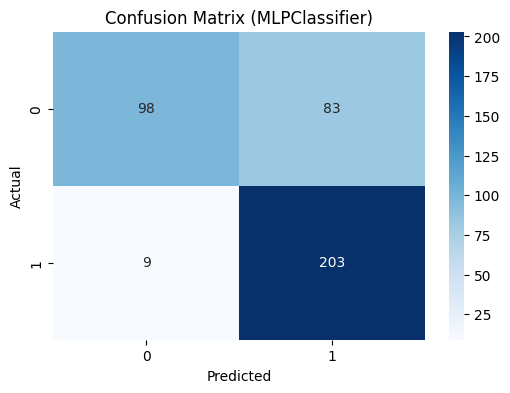

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("asd_data_csv.csv")
X = df.drop(columns='Outcome')
y = df['Outcome']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=2
)

# 4. Replace SVC with MLPClassifier for epoch control
#    hidden_layer_sizes=(64,) → one hidden layer with 64 neurons
#    max_iter=50             → 50 epochs
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='relu',
    solver='adam',
    max_iter=50,
    random_state=2,
    verbose=True
)

# 5. Train (this will run for up to 50 epochs)
mlp.fit(X_train, y_train)

# 6. Evaluate on training set
train_pred = mlp.predict(X_train)
print("--- Training Data Evaluation ---")
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Precision:", precision_score(y_train, train_pred))
print("F1-score:", f1_score(y_train, train_pred))

# 7. Evaluate on test set
test_pred = mlp.predict(X_test)
print("\n--- Test Data Evaluation ---")
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Precision:", precision_score(y_test, test_pred))
print("F1-score:", f1_score(y_test, test_pred))

# 8. Confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (MLPClassifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




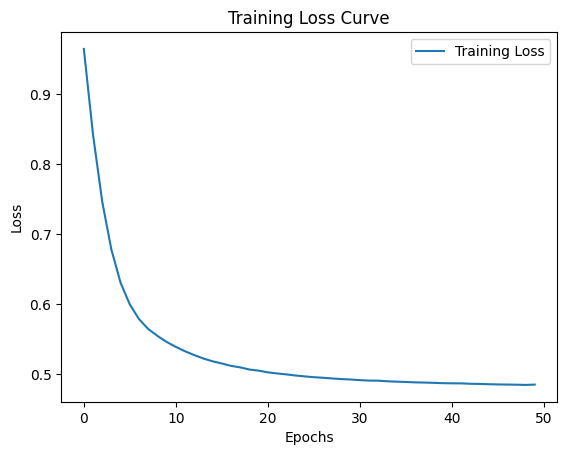

In [ ]:
# Plotting training loss from MLPClassifier
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


In [ ]:
import pickle

In [ ]:
pickle.dump(autism_dataset,open("autism_dataset.pkl","wb"))